<pre><font size=6>Spoken Digit Recognition</font></pre>

<pre>
In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>

</pre>

# **1. Downloading and making Data Ready**

In [1]:
!wget --header="Host: doc-08-0c-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_unm0q6n476f32h7ago3jna292l2crup9=14165932214061485598|1633093425000|ujkh7t3b4i638o8q1vne987irmj4moi8" --header="Connection: keep-alive" "https://doc-08-0c-docs.googleusercontent.com/docs/securesc/ocj5g5i98smf7h037l8383nkr1imnpof/ssffj2upnsv2urve413jc22cg40agobm/1633093425000/00484516897554883881/14165932214061485598/17YGQheavMbM6aeHYjUcGssXfb7eQHo1z?e=download&authuser=0" -c -O 'recordings.zip'

--2021-10-01 13:10:30--  https://doc-08-0c-docs.googleusercontent.com/docs/securesc/ocj5g5i98smf7h037l8383nkr1imnpof/ssffj2upnsv2urve413jc22cg40agobm/1633093425000/00484516897554883881/14165932214061485598/17YGQheavMbM6aeHYjUcGssXfb7eQHo1z?e=download&authuser=0
Resolving doc-08-0c-docs.googleusercontent.com (doc-08-0c-docs.googleusercontent.com)... 108.177.121.132, 2607:f8b0:4001:c19::84
Connecting to doc-08-0c-docs.googleusercontent.com (doc-08-0c-docs.googleusercontent.com)|108.177.121.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2021-10-01 13:10:30 ERROR 403: Forbidden.



## **1.1 We shared recordings.zip, please unzip those.**

In [2]:
!unzip "/content/recordings.zip"

Archive:  /content/recordings.zip
replace recordings/0_jackson_0.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: recordings/0_jackson_0.wav  
  inflating: recordings/0_jackson_1.wav  
  inflating: recordings/0_jackson_10.wav  
  inflating: recordings/0_jackson_11.wav  
  inflating: recordings/0_jackson_12.wav  
  inflating: recordings/0_jackson_13.wav  
  inflating: recordings/0_jackson_14.wav  
  inflating: recordings/0_jackson_15.wav  
  inflating: recordings/0_jackson_16.wav  
  inflating: recordings/0_jackson_17.wav  
  inflating: recordings/0_jackson_18.wav  
  inflating: recordings/0_jackson_19.wav  
  inflating: recordings/0_jackson_2.wav  
  inflating: recordings/0_jackson_20.wav  
  inflating: recordings/0_jackson_21.wav  
  inflating: recordings/0_jackson_22.wav  
  inflating: recordings/0_jackson_23.wav  
  inflating: recordings/0_jackson_24.wav  
  inflating: recordings/0_jackson_25.wav  
  inflating: recordings/0_jackson_26.wav  
  inflating: recordings/0_jackson

In [3]:
import numpy as np
import pandas as pd
import librosa
import os
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow as tf
tf.keras.backend.clear_session()
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import sys
# if you need any imports you can do that here. 

In [4]:
# read the all file names in the recordings folder given by us
# (if you get entire path, it is very useful in future)
# save those files names as list in "all_files"


def get_files():
    recordings_path = '/content/recordings'
    file_names = os.listdir(recordings_path)
    all_files = [(recordings_path + '/' + i) for i in file_names]
    labels = [i[0][0] for i in file_names]
    return all_files, labels


In [5]:
all_files, labels = get_files()

<font size=4>Grader function 1 </font>

In [6]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

In [7]:
# Create a dataframe(name=df_audio) with two columns(path, label)
# You can get the label from the first letter of name.
# Eg: 0_jackson_0 --> 0
# 0_jackson_43 --> 0


file_dict = {'path': all_files, 'label': labels}
df_audio = pd.DataFrame(file_dict)


In [8]:
# info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [9]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [10]:
df_audio = shuffle(df_audio, random_state=33)
# don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [11]:
# split the data into train and validation and save in X_train, X_test, y_train, y_test
# use stratify sampling
# use random state of 45
# use test size of 30%
X = df_audio['path']
y = df_audio['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=45)


In [12]:
X_train.head()

563     /content/recordings/6_jackson_36.wav
1520       /content/recordings/1_theo_34.wav
615     /content/recordings/6_jackson_20.wav
454     /content/recordings/5_nicolas_20.wav
1128    /content/recordings/0_yweweler_6.wav
Name: path, dtype: object

<font size=4>Grader function 3 </font>

In [13]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [14]:
y_train = np.array([int(i) for i in y_train])
y_test = np.array([int(i) for i in y_test])

In [15]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [16]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train
def preprocess(data):
    wav = data.apply(lambda x: load_wav(x))
    samples = [i[0] for i in wav]
    duration = [i[1] for i in wav]
    index = list(data.index)
    data_dict = {'raw_data': samples, 'duration': duration}
    return data_dict, index

In [17]:
train_data_dict, train_index = preprocess(X_train)
X_train_processed = pd.DataFrame(train_data_dict, index=train_index)
test_data_dict, test_index = preprocess(X_test)
X_test_processed = pd.DataFrame(test_data_dict, index=test_index)

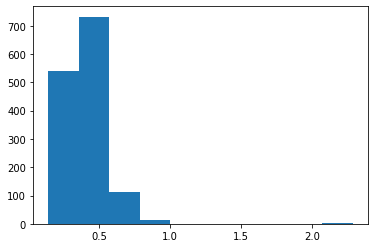

In [18]:
#plot the histogram of the duration for trian
plt.hist(X_train_processed['duration'])
plt.show()

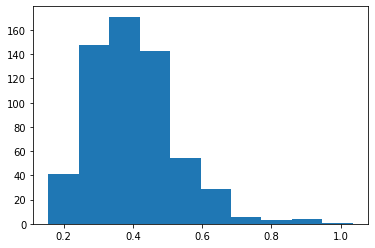

In [19]:
#plot the histogram of the duration for trian
plt.hist(X_test_processed['duration'])
plt.show()

In [20]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
for i in range(0,101, 10):
    print(i,'th percentile is', np.percentile(X_train_processed['duration'], i))

0 th percentile is 0.1435374149659864
10 th percentile is 0.25849433106575964
20 th percentile is 0.301859410430839
30 th percentile is 0.33347392290249434
40 th percentile is 0.3605986394557823
50 th percentile is 0.3900907029478458
60 th percentile is 0.416172335600907
70 th percentile is 0.446625850340136
80 th percentile is 0.4833197278911565
90 th percentile is 0.5535283446712018
100 th percentile is 2.282766439909297


In [21]:
##print 90 to 100 percentile values with step size of 1. 
for i in range(90,101, 1):
    print(i,'th percentile is', np.percentile(X_train_processed['duration'], i))

90 th percentile is 0.5535283446712018
91 th percentile is 0.5716077097505673
92 th percentile is 0.581298866213152
93 th percentile is 0.5997356009070297
94 th percentile is 0.617911111111111
95 th percentile is 0.6330226757369615
96 th percentile is 0.6424290249433107
97 th percentile is 0.6597909297052154
98 th percentile is 0.6896798185941042
99 th percentile is 0.7930458049886621
100 th percentile is 2.282766439909297


<font size=4>Grader function 4 </font>

In [22]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<pre>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset. 

While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640

Pad with Zero if length of sequence is less than 17640 else Truncate the number. 

Also create a masking vector for train and test. 

masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.
</pre>

In [23]:
max_length  = 17640

In [24]:
def padding_data(index, data, max_length):
    seq = []
    mask = []
    for i in index:
        length = len(data.loc[i, 'raw_data'])
        value = data.loc[i, 'raw_data']
        if (length >= max_length):
            seq.append(value[0:max_length])
            mask.append(np.ones(max_length))
        else:
            zero_pad = np.zeros(max_length - length)
            mask_one_padd = np.ones(length - 1)
            mask_zero_padd = np.zeros((max_length - length) + 1)
            seq.append(np.concatenate((value, zero_pad)))
            mask.append(np.concatenate((mask_one_padd, mask_zero_padd)))
    seq = np.array(seq)
    mask = np.array(mask)
    mask = mask.astype('bool')
    return seq, mask


In [25]:
X_train_pad_seq, X_train_mask = padding_data(train_index,
                                             X_train_processed,
                                             max_length)
print(X_train_pad_seq.shape)
print(X_train_mask.shape)

(1400, 17640)
(1400, 17640)


In [26]:
X_test_pad_seq, X_test_mask = padding_data(test_index,
                                           X_test_processed,
                                           max_length)

print(X_test_pad_seq.shape)
print(X_test_mask.shape)

(600, 17640)
(600, 17640)


<font size=4>Grader function 5 </font>

In [27]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

### 1. Giving Raw data directly. 

<pre>
Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). 
3. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
4. make sure that it won't overfit. 
5. You are free to include any regularization
</pre>

## **Model-1**

In [28]:
def Raw_data_model():
    inp_seq = Input(shape=(max_length, 1))
    inp_mask = Input(shape=(max_length), dtype='bool')
    lstm = LSTM(28, name="LSTM_layer")(inp_seq, mask=inp_mask)
    dense_1 = Dense(units=16, activation='relu', kernel_initializer="he_normal")(lstm)
    dense_2 = Dense(units=16, activation='relu', kernel_initializer="he_normal")(dense_1)
    dense_3 = Dense(units=16, activation='relu', kernel_initializer="he_normal")(dense_2)
    output = Dense(units=10, activation='softmax')(dense_3)
    model = Model(inputs=[inp_seq, inp_mask], outputs=output)
    return model

In [29]:
tf.keras.backend.clear_session()
Model_1 = Raw_data_model()
Model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 17640)]      0                                            
__________________________________________________________________________________________________
LSTM_layer (LSTM)               (None, 28)           3360        input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 16)           464         LSTM_layer[0][0]             

In [30]:
X_train_raw = [X_train_pad_seq, X_train_mask]
X_test_raw =  [X_test_pad_seq, X_test_mask]

In [32]:
# F1-Score
class Metrics(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()
        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            val_predict = np.argmax(self.model.predict(self.X_val), axis=-1)
            val_targ = self.y_val
            _val_f1 = f1_score(val_targ, val_predict, average='micro')
            self.val_f1s.append(_val_f1)
            print(" Validation F1 Score: %f " % (_val_f1))
            return

metrics = Metrics(validation_data=(X_test_raw, y_test), interval=1)

In [33]:
# train your model
def Train_Model_1():
    optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)
    Model_1.compile(optimizer=optimiser,
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

    filepath = '/content/Models/Model_1.h5'

    checkpoint = ModelCheckpoint(filepath,
                                 monitor='val_loss',
                                 verbose=1,
                                 save_best_only=True,
                                 save_weights_only=False,
                                 mode='min')

    ER = EarlyStopping(
        monitor="val_loss",
        patience=10,
        verbose=1,
        mode="min",
        baseline=None,
        restore_best_weights=True
    )
    # write the REducelronplateau code here
    LR = ReduceLROnPlateau(monitor='val_loss',
                           factor=0.3,
                           patience=5,
                           verbose=1)

    callbacks_list = [checkpoint, LR, ER, metrics]

    history = Model_1.fit(x=X_train_raw,
                          y=y_train,
                          epochs=10,
                          batch_size=256,
                          callbacks=[callbacks_list],
                          validation_data=(X_test_raw, y_test),
                          validation_batch_size=256)
    return history


In [34]:
if __name__ == '__main__':
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True
    sess = tf.compat.v1.Session(config=config)
    tf.compat.v1.keras.backend.set_session(sess)

    if len(sys.argv) > 1:
        gpu = sys.argv[1]
    device = '/device:GPU:0'   #using Gpu forpaced training

    with tf.device(device):
       history_1 = Train_Model_1()

Epoch 1/10
6/6 [==============================] - 12s 1s/step - loss: 2.3034 - acc: 0.0971 - val_loss: 2.3028 - val_acc: 0.1000

Epoch 00001: val_loss improved from inf to 2.30276, saving model to /content/Models/Model_1.h5
 Validation F1 Score: 0.100000 
Epoch 2/10
6/6 [==============================] - 5s 815ms/step - loss: 2.3027 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00002: val_loss improved from 2.30276 to 2.30263, saving model to /content/Models/Model_1.h5
 Validation F1 Score: 0.100000 
Epoch 3/10
6/6 [==============================] - 5s 841ms/step - loss: 2.3026 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00003: val_loss improved from 2.30263 to 2.30260, saving model to /content/Models/Model_1.h5
 Validation F1 Score: 0.100000 
Epoch 4/10
6/6 [==============================] - 5s 836ms/step - loss: 2.3026 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.0933

Epoch 00004: val_loss improved from 2.30260 to 2.30260, saving model to /content/Models/M

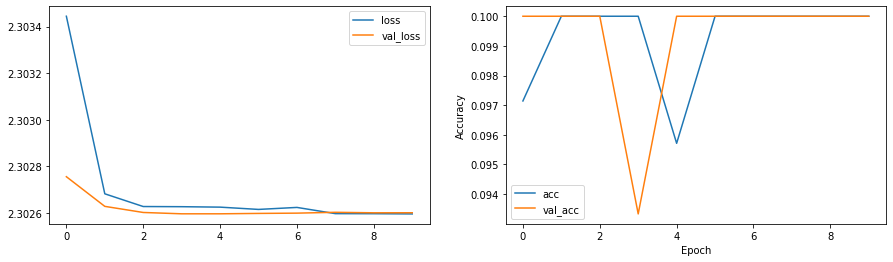

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axes[0].plot(history_1.history['loss'])
axes[0].plot(history_1.history['val_loss'])
axes[0].legend(['loss', 'val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
axes[1].plot(history_1.history['acc'])
axes[1].plot(history_1.history['val_acc'])
axes[1].legend(['acc', 'val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

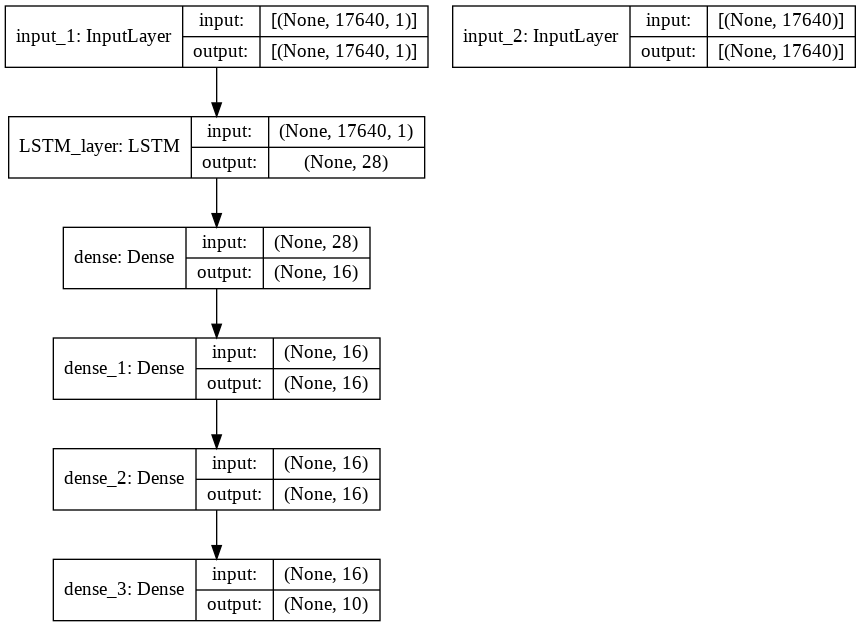

In [36]:
tf.keras.utils.plot_model(
    Model_1, to_file='Model_1.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)

## **2. Converting into spectrogram and giving spectrogram data as input**  
<pre>
We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram
</pre>

In [37]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [38]:
# use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
# save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)


def spectrogram(data):
    x = []
    for i in data:
        x.append(convert_to_spectrogram(i))
    return np.array(x)

In [39]:
X_train_spectrogram = spectrogram(X_train_pad_seq)
X_test_spectrogram = spectrogram(X_test_pad_seq)

<font size=4>Grader function 6 </font>

In [40]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True

<pre>
Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (#., time_steps, features) average the output of every time step i.e, you should get (#.,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
5. make sure that it won't overfit. 
6. You are free to include any regularization
</pre>

## **Model-2**

In [41]:
def Spectogram_Model():
    spectogram_input = Input(shape=(X_train_spectrogram.shape[1:]))
    lstm = tf.keras.layers.LSTM(512,
                                name="LSTM_layer_1",
                                return_sequences=True)(spectogram_input)
    lstm_2 = tf.keras.layers.LSTM(256,
                                  name="LSTM_layer_2",
                                  return_sequences=True)(lstm)
    lstm_3 = tf.keras.layers.LSTM(128,
                                  name="LSTM_layer_3",
                                  return_sequences=True)(lstm_2)

    tensor = tf.keras.layers.Reshape(target_shape=(64, 128, 1))(lstm_3)
    average = tf.keras.layers.TimeDistributed(GlobalAveragePooling1D())(tensor)
    tensor_2 = tf.keras.layers.Reshape(target_shape=(64,))(average)
    dense_1 = Dense(units=512, activation='relu')(tensor_2)
    dense_2 = Dense(units=256, activation='relu')(dense_1)
    dense_3 = Dense(units=128, activation='relu')(dense_2)
    output = Dense(units=10, activation='softmax')(dense_3)
    model = Model(inputs=spectogram_input, outputs=output)
    return model

In [42]:
Model_2 = Spectogram_Model()
Model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 35)]          0         
_________________________________________________________________
LSTM_layer_1 (LSTM)          (None, 64, 512)           1122304   
_________________________________________________________________
LSTM_layer_2 (LSTM)          (None, 64, 256)           787456    
_________________________________________________________________
LSTM_layer_3 (LSTM)          (None, 64, 128)           197120    
_________________________________________________________________
reshape (Reshape)            (None, 64, 128, 1)        0         
_________________________________________________________________
time_distributed (TimeDistri (None, 64, 1)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 64)                0   

In [43]:
class Metrics(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()
        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            val_predict = np.argmax(self.model.predict(self.X_val), axis=-1)
            val_targ = self.y_val
            _val_f1 = f1_score(val_targ, val_predict, average='micro')
            self.val_f1s.append(_val_f1)
            print("Validation F1: %f " % (_val_f1))
            return

metrics = Metrics(validation_data=(X_test_spectrogram, y_test), interval=1)

In [44]:
# train your model
def Train_Model_2():
    optimiser = tf.keras.optimizers.Adam(0.001)

    Model_2.compile(optimizer=optimiser,
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

    filepath = '/content/Models/Model_2.h5'

    checkpoint = ModelCheckpoint(filepath,
                                 monitor='val_loss',
                                 verbose=1,
                                 save_best_only=True,
                                 save_weights_only=False,
                                 mode='min')

    ER = EarlyStopping(
        monitor="val_loss",
        patience=10,
        verbose=1,
        mode="min",
        baseline=None,
        restore_best_weights=True
    )
    # write the REducelronplateau code here
    LR = ReduceLROnPlateau(monitor='val_loss',
                           factor=0.3,
                           patience=5,
                           verbose=1)

    callbacks_list = [checkpoint, LR, ER, metrics]

    history = Model_2.fit(x=X_train_spectrogram,
                          y=y_train,
                          epochs=300,
                          batch_size=32,
                          callbacks=[callbacks_list],
                          validation_data=(X_test_spectrogram, y_test),
                          validation_batch_size=32)
    return history


In [45]:
if __name__ == '__main__':
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True
    sess = tf.compat.v1.Session(config=config)
    tf.compat.v1.keras.backend.set_session(sess)

    if len(sys.argv) > 1:
        gpu = sys.argv[1]
    device = '/device:GPU:0'   #using Gpu forpaced training

    with tf.device(device):
       history_2 = Train_Model_2()

Epoch 1/300
44/44 [==============================] - 6s 48ms/step - loss: 2.0560 - acc: 0.2079 - val_loss: 2.1222 - val_acc: 0.2233

Epoch 00001: val_loss improved from inf to 2.12224, saving model to /content/Models/Model_2.h5
Validation F1: 0.223333 
Epoch 2/300
44/44 [==============================] - 1s 27ms/step - loss: 1.5684 - acc: 0.3900 - val_loss: 1.2488 - val_acc: 0.5217

Epoch 00002: val_loss improved from 2.12224 to 1.24877, saving model to /content/Models/Model_2.h5
Validation F1: 0.521667 
Epoch 3/300
44/44 [==============================] - 1s 27ms/step - loss: 1.2158 - acc: 0.5107 - val_loss: 1.3609 - val_acc: 0.4550

Epoch 00003: val_loss did not improve from 1.24877
Validation F1: 0.455000 
Epoch 4/300
44/44 [==============================] - 1s 27ms/step - loss: 1.0319 - acc: 0.5736 - val_loss: 0.9171 - val_acc: 0.6300

Epoch 00004: val_loss improved from 1.24877 to 0.91712, saving model to /content/Models/Model_2.h5
Validation F1: 0.630000 
Epoch 5/300
44/44 [=====

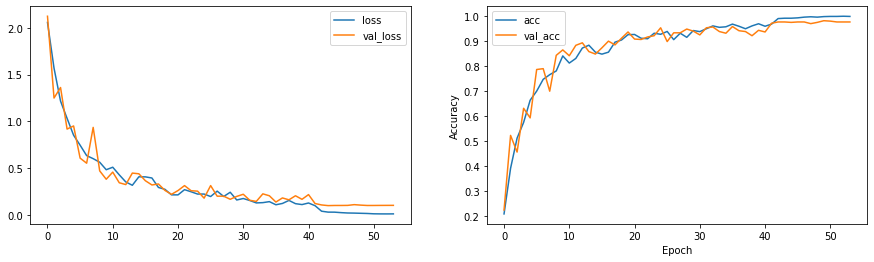

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axes[0].plot(history_2.history['loss'])
axes[0].plot(history_2.history['val_loss'])
axes[0].legend(['loss', 'val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
axes[1].plot(history_2.history['acc'])
axes[1].plot(history_2.history['val_acc'])
axes[1].legend(['acc', 'val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

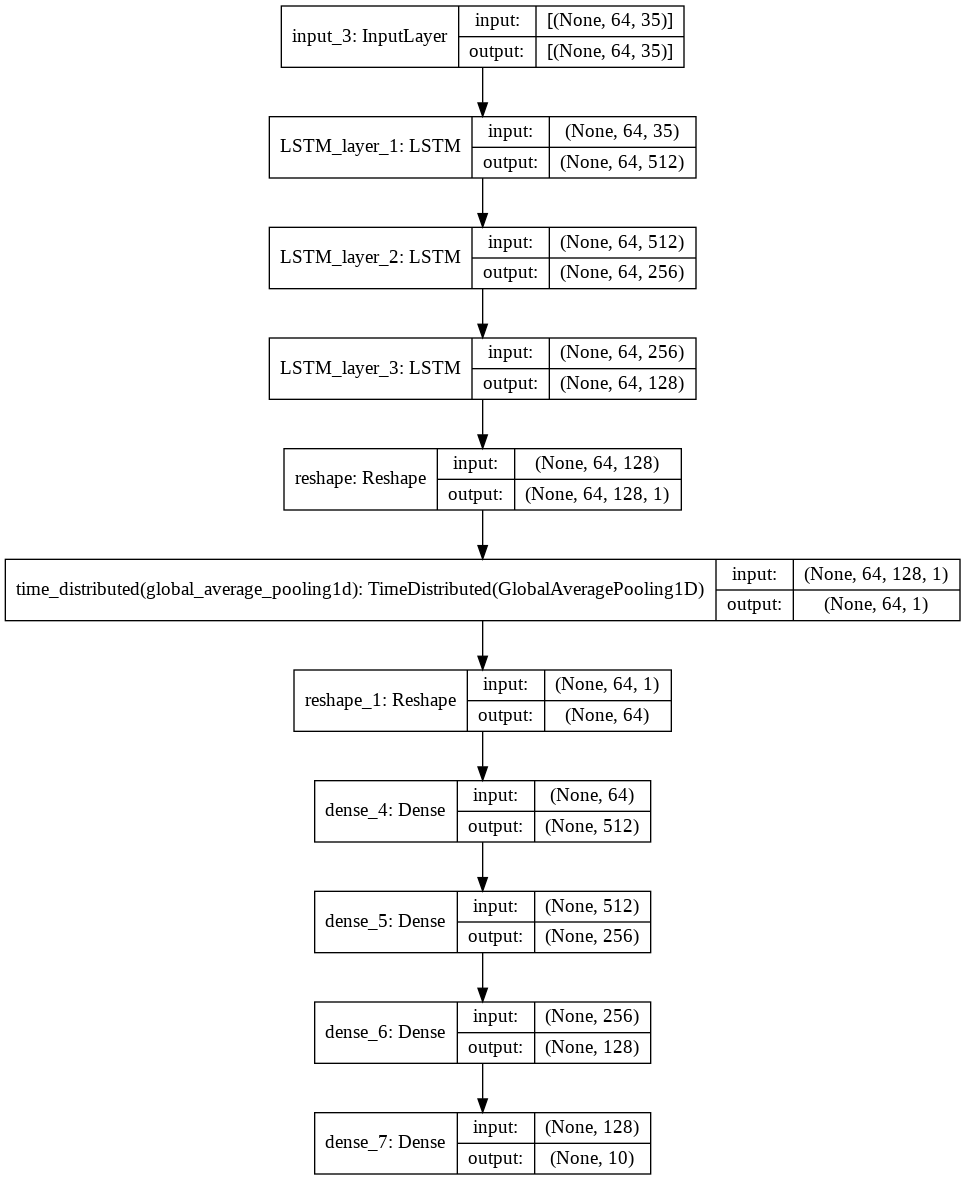

In [47]:
tf.keras.utils.plot_model(
    Model_2, to_file='Model_2.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)

# **3. Data augmentation** 
<pre>
Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.
</pre>

In [48]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [49]:
temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [50]:
len(aug_temp)

9

As discussed above, for one data point, we will get 9 augmented data points.  

Split data into train and test (80-20 split)

We have 2000 data points(1600 train points, 400 test points) 

Do augmentation only on train data, after augmentation we will get 14400 train points. 

do the above steps i.e training with raw data and spectrogram data with augmentation.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_audio['path'],
                                                    df_audio['label'],
                                                    stratify=df_audio.label,
                                                    test_size=0.3,
                                                    random_state=45)

In [52]:
train_aug_data = []
train_labels = []

for path, label in tqdm(zip(X_train.values, y_train.values)):
    aug_data = generate_augmented_data(path)
    train_aug_data.extend(aug_data)
    train_labels.extend(label*9)

X_train_processed = pd.DataFrame({'raw_data': train_aug_data,
                                  'label': train_labels})


1400it [04:01,  5.80it/s]


In [53]:
test_data = []
for path in X_test.values:
    test_data.append(load_wav(path, get_duration=False))

X_test_processed = pd.DataFrame({'raw_data': test_data,
                                 'label': y_test.values})

In [54]:
max_length  = 17640

In [55]:
X_train_pad_seq = pad_sequences(X_train_processed.raw_data, maxlen=max_length,
                                dtype='float32', padding='post',
                                truncating='post')
X_test_pad_seq = pad_sequences(X_test_processed.raw_data, maxlen=max_length,
                               dtype='float32', padding='post',
                               truncating='post')

y_train = X_train_processed.label.values.astype('int')
y_test = X_test_processed.label.values.astype('int')

X_train_mask = X_train_pad_seq != 0
X_test_mask = X_test_pad_seq != 0

In [56]:
X_train_pad_seq = np.expand_dims(X_train_pad_seq, -1)
X_test_pad_seq = np.expand_dims(X_test_pad_seq, -1)
X_train_aug = [X_train_pad_seq, X_train_mask]
X_test_aug = [X_test_pad_seq, X_test_mask]

## Model-3

In [57]:
def Model_3():
    inp_seq = Input(shape=(max_length, 1))
    inp_mask = Input(shape=(max_length), dtype='bool')
    lstm = tf.keras.layers.LSTM(28, name="LSTM_layer")(inp_seq, mask=inp_mask)
    dense_1 = Dense(units=16, activation='relu')(lstm)
    dense_2 = Dense(units=16, activation='relu')(dense_1)
    dense_3 = Dense(units=16, activation='relu')(dense_2)
    output = Dense(units=10, activation='softmax')(dense_3)
    model = Model(inputs=[inp_seq, inp_mask], outputs=output)
    return model

In [58]:
tf.keras.backend.clear_session()
Model_3 = Model_3()
Model_3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 17640)]      0                                            
__________________________________________________________________________________________________
LSTM_layer (LSTM)               (None, 28)           3360        input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 16)           464         LSTM_layer[0][0]             

In [59]:
class Metrics(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()
        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            val_predict = np.argmax(self.model.predict(self.X_val), axis=-1)
            val_targ = self.y_val
            _val_f1 = f1_score(val_targ, val_predict, average='micro')
            self.val_f1s.append(_val_f1)
            print("Validation F1: %f " % (_val_f1))
            return

metrics = Metrics(validation_data=(X_test_aug, y_test), interval=1)

In [62]:
# train your model
def Train_Model_3():
    optimiser = tf.keras.optimizers.Adam(0.001)

    Model_3.compile(optimizer=optimiser,
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

    filepath = '/content/Models/Model_3.h5'

    checkpoint = ModelCheckpoint(filepath,
                                 monitor='val_loss',
                                 verbose=1,
                                 save_best_only=True,
                                 save_weights_only=False,
                                 mode='min')

    ER = EarlyStopping(
        monitor="val_loss",
        patience=10,
        verbose=1,
        mode="min",
        baseline=None,
        restore_best_weights=True
    )
  
    LR = ReduceLROnPlateau(monitor='val_loss',
                           factor=0.3,
                           patience=5,
                           verbose=1)

    callbacks_list = [checkpoint, LR, ER, metrics]

    history = Model_3.fit(x=X_train_aug,
                          y=y_train,
                          epochs=10,
                          batch_size=512,
                          callbacks=[callbacks_list],
                          validation_data=(X_test_aug, y_test),
                          validation_batch_size=512)
    return history


In [63]:
if __name__ == '__main__':
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True
    sess = tf.compat.v1.Session(config=config)
    tf.compat.v1.keras.backend.set_session(sess)

    if len(sys.argv) > 1:
        gpu = sys.argv[1]
    device = '/device:GPU:0'   #using Gpu forpaced training

    with tf.device(device):
       history_3 = Train_Model_3()

Epoch 1/10
25/25 [==============================] - 29s 1s/step - loss: 2.3027 - acc: 0.0944 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00001: val_loss improved from inf to 2.30259, saving model to /content/Models/Model_3.h5
Validation F1: 0.100000 
Epoch 2/10
25/25 [==============================] - 24s 962ms/step - loss: 2.3026 - acc: 0.0943 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00002: val_loss improved from 2.30259 to 2.30259, saving model to /content/Models/Model_3.h5
Validation F1: 0.100000 
Epoch 3/10
25/25 [==============================] - 24s 962ms/step - loss: 2.3026 - acc: 0.0963 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00003: val_loss improved from 2.30259 to 2.30259, saving model to /content/Models/Model_3.h5
Validation F1: 0.100000 
Epoch 4/10
25/25 [==============================] - 24s 965ms/step - loss: 2.3026 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00004: val_loss did not improve from 2.30259
Validation F1: 0.100000 
Epoch 5/10
25/25 [=====

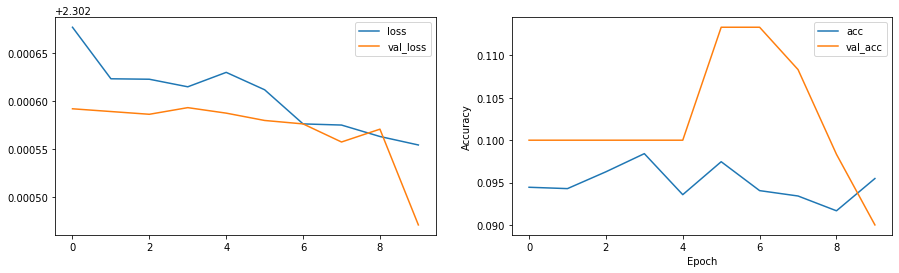

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axes[0].plot(history_3.history['loss'])
axes[0].plot(history_3.history['val_loss'])
axes[0].legend(['loss', 'val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
axes[1].plot(history_3.history['acc'])
axes[1].plot(history_3.history['val_acc'])
axes[1].legend(['acc', 'val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

## Model-4

In [65]:
X_train_pad_seq = np.squeeze(X_train_pad_seq, axis=-1)
X_test_pad_seq = np.squeeze(X_test_pad_seq, axis=-1)

X_train_spectrogram = []
for i in X_train_pad_seq:
    logmel = convert_to_spectrogram(i)
    X_train_spectrogram.append(logmel)
X_train_spectrogram = np.array(X_train_spectrogram)

X_test_spectrogram = []
for j in X_test_pad_seq:
    logmel = convert_to_spectrogram(j)
    X_test_spectrogram.append(logmel)
X_test_spectrogram = np.array(X_test_spectrogram)

In [66]:
def Model_4():
    spectogram_input = Input(shape=(64, 35,))
    lstm = tf.keras.layers.LSTM(512,
                                name="LSTM_layer_1",
                                return_sequences=True)(spectogram_input)

    lstm_2 = tf.keras.layers.LSTM(256,
                                  name="LSTM_layer_2",
                                  return_sequences=True)(lstm)

    lstm_3 = tf.keras.layers.LSTM(128,
                                  name="LSTM_layer_3",
                                  return_sequences=True)(lstm_2)

    tensor = tf.keras.layers.Reshape(target_shape=(64, 128, 1))(lstm_3)
    average = tf.keras.layers.TimeDistributed(tf.keras.layers.GlobalAveragePooling1D())(tensor)
    tensor_2 = tf.keras.layers.Reshape(target_shape=(64,))(average)
    dense_1 = Dense(units=512, activation='relu')(tensor_2)
    dense_2 = Dense(units=256, activation='relu')(dense_1)
    dense_3 = Dense(units=128, activation='relu')(dense_2)
    output = Dense(units=10, activation='softmax')(dense_3)
    model = Model(inputs=spectogram_input, outputs=output)
    return model

In [67]:
Model_4 = Model_4()
Model_4.summary() 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 35)]          0         
_________________________________________________________________
LSTM_layer_1 (LSTM)          (None, 64, 512)           1122304   
_________________________________________________________________
LSTM_layer_2 (LSTM)          (None, 64, 256)           787456    
_________________________________________________________________
LSTM_layer_3 (LSTM)          (None, 64, 128)           197120    
_________________________________________________________________
reshape (Reshape)            (None, 64, 128, 1)        0         
_________________________________________________________________
time_distributed (TimeDistri (None, 64, 1)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 64)                0   

In [68]:
class Metrics(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()
        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            val_predict = np.argmax(self.model.predict(self.X_val), axis=-1)
            val_targ = self.y_val
            _val_f1 = f1_score(val_targ, val_predict, average='micro')
            self.val_f1s.append(_val_f1)
            print(" Validation F1: %f " % (_val_f1))
            return

metrics = Metrics(validation_data=(X_test_spectrogram, y_test), interval=1)

In [69]:
# train your model
def Train_Model_4():
    optimiser = tf.keras.optimizers.Adam(0.001)

    Model_4.compile(optimizer=optimiser,
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

    filepath = '/content/Models/Model_4.h5'

    checkpoint = ModelCheckpoint(filepath,
                                 monitor='val_loss',
                                 verbose=1,
                                 save_best_only=True,
                                 save_weights_only=False,
                                 mode='min')

    ER = EarlyStopping(
        monitor="val_loss",
        patience=10,
        verbose=1,
        mode="min",
        baseline=None,
        restore_best_weights=True
    )
    # write the REducelronplateau code here
    LR = ReduceLROnPlateau(monitor='val_loss',
                           factor=0.3,
                           patience=5,
                           verbose=1)

    callbacks_list = [checkpoint, LR, ER, metrics]

    history = Model_4.fit(x=X_train_spectrogram,
                          y=y_train,
                          epochs=100,
                          batch_size=128,
                          callbacks=[callbacks_list],
                          validation_data=(X_test_spectrogram, y_test),
                          validation_batch_size=128)
    return history


In [70]:
if __name__ == '__main__':
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True
    sess = tf.compat.v1.Session(config=config)
    tf.compat.v1.keras.backend.set_session(sess)

    if len(sys.argv) > 1:
        gpu = sys.argv[1]
    device = '/device:GPU:0'   #using Gpu forpaced training

    with tf.device(device):
       history_4 = Train_Model_4()

Epoch 1/100
99/99 [==============================] - 8s 46ms/step - loss: 1.2591 - acc: 0.5227 - val_loss: 0.6822 - val_acc: 0.7750

Epoch 00001: val_loss improved from inf to 0.68217, saving model to /content/Models/Model_4.h5
 Validation F1: 0.775000 
Epoch 2/100
99/99 [==============================] - 4s 36ms/step - loss: 0.5489 - acc: 0.8002 - val_loss: 0.2750 - val_acc: 0.9183

Epoch 00002: val_loss improved from 0.68217 to 0.27504, saving model to /content/Models/Model_4.h5
 Validation F1: 0.918333 
Epoch 3/100
99/99 [==============================] - 4s 36ms/step - loss: 0.3556 - acc: 0.8735 - val_loss: 0.2213 - val_acc: 0.9283

Epoch 00003: val_loss improved from 0.27504 to 0.22135, saving model to /content/Models/Model_4.h5
 Validation F1: 0.928333 
Epoch 4/100
99/99 [==============================] - 4s 37ms/step - loss: 0.2804 - acc: 0.9012 - val_loss: 0.3054 - val_acc: 0.8883

Epoch 00004: val_loss did not improve from 0.22135
 Validation F1: 0.888333 
Epoch 5/100
99/99 [=

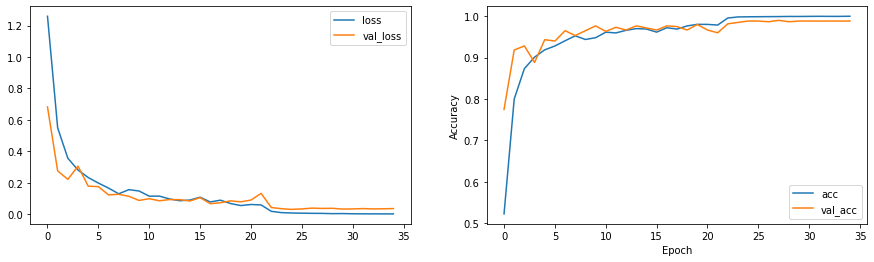

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axes[0].plot(history_4.history['loss'])
axes[0].plot(history_4.history['val_loss'])
axes[0].legend(['loss', 'val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
axes[1].plot(history_4.history['acc'])
axes[1].plot(history_4.history['val_acc'])
axes[1].legend(['acc', 'val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# **Conclusion**

In [73]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model Name", "Validation F1"])

# Add rows
myTable.add_row(["Model-1 Raw Data", "10.00%"])
myTable.add_row(["Model-2 Spectogram", "97.50%"])
myTable.add_row(["Model-3 Augmented Raw Data", "10.00%"])
myTable.add_row(["Model-4 Augmented Spectogram", "98.83%"])


print(myTable)


+------------------------------+---------------+
|          Model Name          | Validation F1 |
+------------------------------+---------------+
|       Model-1 Raw Data       |     10.00%    |
|      Model-2 Spectogram      |     97.50%    |
|  Model-3 Augmented Raw Data  |     10.00%    |
| Model-4 Augmented Spectogram |     98.83%    |
+------------------------------+---------------+
